## Apendix
In this appendix, one will find the data that did not quite fit into the final project.

Listed first is the health data that was not used because there was no clear way to combine the data sets. The health data had no column district, so it could not overlap with the other datasets. Therefore this data had to be scratched; however, it still makes for a compelling case on how poverty and inequalities in New York City affect a person's access to healthcare. This first section is the data cleaning.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

In [5]:
health = pd.read_csv('health.csv')
health.head()
print(health.shape)
#grabbing columns from data set
columns_we_want = [ "insuredgateway19","generalhealth", "visitnonpcp12m19", "pcp19","didntgetcare19","emp3", "insure5","birthsex","imputed_neighpovgroup4_1418", "fluvaccineshot","everhepavaccine","fruitveg19"]
health[columns_we_want]
health = health[columns_we_want]
#renaming columns
health = health.rename(columns = {'insuredgateway19' : 'insured', 'visitnonpcp12m19' : 'seen_a_doctor_in_12months?', 'pcp19' : 'primary_doctor', 'insure5': 'who_insures_you','emp3': 'employed', 'imputed_neighpovgroup4_1418': 'below_poverty','fruitveg19':'fruit_veggie_servings','everhepavaccine': 'revieved_hepatatis_vaccine','didntgetcare19': 'didnt_get_care'})
health.head()

FileNotFoundError: [Errno 2] No such file or directory: 'health.csv'

This part of the data cleaning was used to change the data from number representatations to categories with clearer meaning.

In [3]:
#Renaming data points in below_poverty and other columns I am preforming analysis on so that the data is understandable to the user. 
health_copy1 = health.copy()
health_copy1.loc[health_copy1.below_poverty == 1, "below_poverty"] = "0 - <10% (low pov)%"
health_copy1.loc[health_copy1.below_poverty == 2, "below_poverty"] = "10 - <20%"
health_copy1.loc[health_copy1.below_poverty == 3, "below_poverty"] = "20 - <30%"
health_copy1.loc[health_copy1.below_poverty == 4, "below_poverty"] = "30 - <100% (very high)"

health_copy1.loc[health_copy1.insured == 1, "insured"] = "yes"
health_copy1.loc[health_copy1.insured == 2, "insured"] = "no"

health_copy1.loc[health_copy1.primary_doctor == 1, "primary_doctor"] = "yes"
health_copy1.loc[health_copy1.primary_doctor == 2, "primary_doctor"] = "no"

health_copy1.loc[health_copy1.didnt_get_care == 1, "didnt_get_care"] = "yes"
health_copy1.loc[health_copy1.didnt_get_care == 2, "didnt_get_care"] = "no"

health_copy1.loc[health_copy1.who_insures_you == 1, "who_insures_you"] = "Private"
health_copy1.loc[health_copy1.who_insures_you == 2, "who_insures_you"] = "self-purchase"
health_copy1.loc[health_copy1.who_insures_you == 3, "who_insures_you"] = "Medicare"
health_copy1.loc[health_copy1.who_insures_you == 4, "who_insures_you"] = "Medicaid"
health_copy1.loc[health_copy1.who_insures_you == 4, "who_insures_you"] = "Others"
health_copy1.loc[health_copy1.who_insures_you == 4, "who_insures_you"] = "Uninsured"


display(health_copy1.head())

NameError: name 'health' is not defined

This is the analysis that was performed using the health data set which showed how the percent below poverty affected accees to primary doctor, insurance, and one's ability to get care. 

In [65]:
#shows the percent of ppl who are below poverty and their access to helathcare 
display(health_copy1.didnt_get_care.value_counts(normalize=True)*100)
display(health_copy1.insured.value_counts(normalize=True)*100)
display(health_copy1.primary_doctor.value_counts(normalize=True)*100)

group_poverty2 = health_copy1.groupby('below_poverty').primary_doctor
dr_poverty = group_poverty2.value_counts(normalize=True)*100
print(dr_poverty)

group_poverty = health_copy1.groupby('below_poverty').insured
insured_poverty= group_poverty.value_counts(normalize=True)*100
print(insured_poverty)

group_poverty3 = health_copy1.groupby('below_poverty').didnt_get_care
didnt_poverty = group_poverty3.value_counts(normalize=True)*100
print(didnt_poverty)

#histogram 
plt.hist(health_copy1['below_poverty'])
plt.xlabel('% of residents below the poverty line',fontsize=10)
plt.ylabel("#  of residents living in those neighborhoods",fontsize=10)
plt.title('distribution of residents living in specific income neighborhoods',fontsize=10)

NameError: name 'health_copy1' is not defined

The next analysis also did not make it into the final project because there wasn't enough data to make accurate assumptions about the correlation # total students and the percent in temporary housing. Therefore, the data was turned into a bar graph instead.

In [7]:
final_ds = pd.read_csv('final_ds.csv')

#Group by each burough so that each le_[borough] consists of its own neightborhood.
by_bronx = final_ds.loc[final_ds["borough"] == "Bronx"]
le_bronx = by_bronx.groupby("borough_and_district_#").mean()

by_brooklyn = final_ds.loc[final_ds["borough"] == "Brooklyn"]
le_brooklyn = by_brooklyn.groupby("borough_and_district_#").mean()

by_manhattan = final_ds.loc[final_ds["borough"] == "Manhattan"]
le_manhattan = by_manhattan.groupby("borough_and_district_#").mean()

by_queens = final_ds.loc[final_ds["borough"] == "Queens"]
le_queens = by_queens.groupby("borough_and_district_#").mean()

by_SI = final_ds.loc[final_ds["borough"] == "Staten Island"]
le_SI = by_SI.groupby("borough_and_district_#").mean()

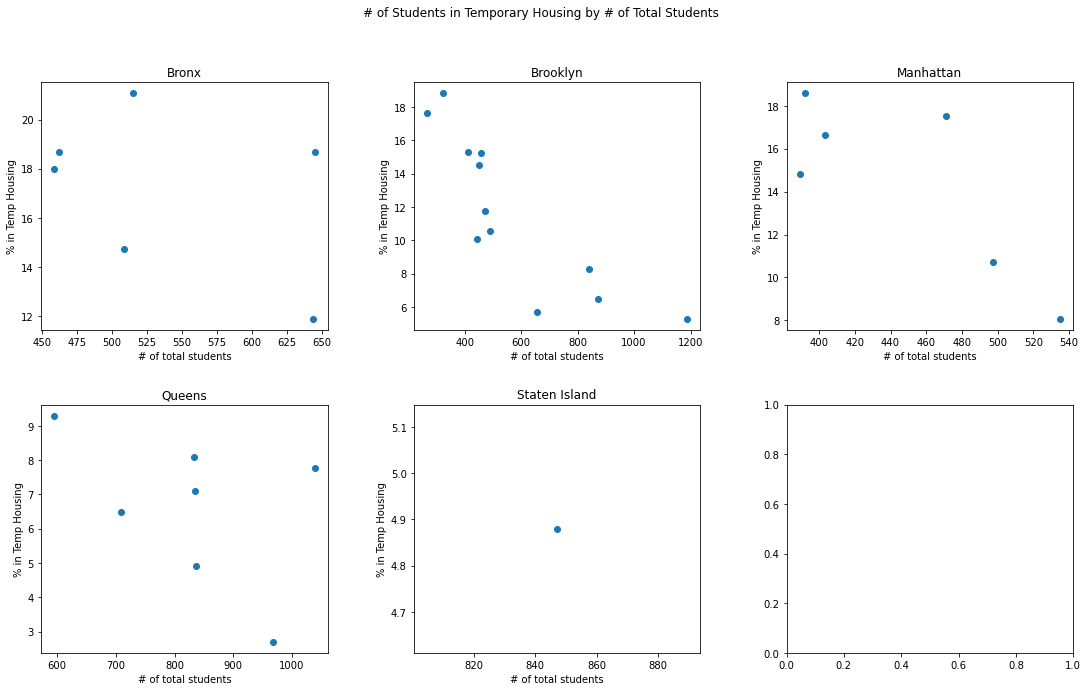

The correlation is for Bronx is -0.43
The correlation is for Brooklyn is -0.84
The correlation is for Manhattan is -0.79
The correlation is for Queens is -0.46
There is no correlation for Staten Island because there is only one point


In [8]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('# of Students in Temporary Housing by # of Total Students')

axs[0, 0].scatter(le_bronx["#_total_students"], le_bronx["%_students_in_temporary_housing"])
axs[0, 0].set_title('Bronx')
axs[0, 1].scatter(le_brooklyn["#_total_students"], le_brooklyn["%_students_in_temporary_housing"])
axs[0, 1].set_title('Brooklyn')
axs[0, 2].scatter(le_manhattan["#_total_students"], le_manhattan["%_students_in_temporary_housing"])
axs[0, 2].set_title('Manhattan')
axs[1, 0].scatter(le_queens["#_total_students"], le_queens["%_students_in_temporary_housing"])
axs[1, 0].set_title('Queens')
axs[1, 1].scatter(le_SI["#_total_students"], le_SI["%_students_in_temporary_housing"])
axs[1, 1].set_title('Staten Island')

plt.subplots_adjust(wspace=0.30, hspace=.30)
for ax in axs.flat[:-1]:
    ax.set(xlabel = "# of total students", ylabel='% in Temp Housing')   
plt.show()

print("The correlation is for Bronx is {:.2f}".format(le_bronx["#_total_students"].corr(le_bronx["%_students_in_temporary_housing"])))
print("The correlation is for Brooklyn is {:.2f}".format(le_brooklyn["#_total_students"].corr(le_brooklyn["%_students_in_temporary_housing"])))
print("The correlation is for Manhattan is {:.2f}".format(le_manhattan["#_total_students"].corr(le_manhattan["%_students_in_temporary_housing"])))
print("The correlation is for Queens is {:.2f}".format(le_queens["#_total_students"].corr(le_queens["%_students_in_temporary_housing"])))
print("There is no correlation for Staten Island because there is only one point")

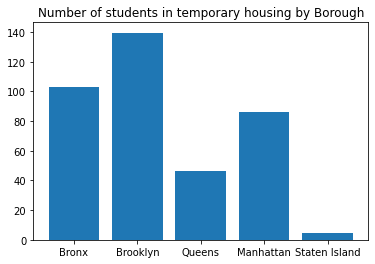

In [9]:
x1 = [sum(le_bronx["%_students_in_temporary_housing"]), sum(le_brooklyn["%_students_in_temporary_housing"]), sum(le_queens["%_students_in_temporary_housing"]), sum(le_manhattan["%_students_in_temporary_housing"]), sum(le_SI["%_students_in_temporary_housing"])]
y1 = ["Bronx", "Brooklyn", "Queens", "Manhattan", "Staten Island"]
plt.bar(y1, x1)
plt.title("Number of students in temporary housing by Borough")
plt.show()

The next set of data analysis was tossed because it would be considered data manipulation and didn't give an accurate representation of what was actually occuring in the data set. This data was origionally used wioth the purpose of showing that the Bronx and Manhattan clusters were more accuratelu predicted: however, making just two cluster divided the data into two just boroughs. This meant that the other three boroughs were being categorized into the only two clusters and were then labelled as Manhattan or the Bronx even though they were neither. The first cluster is for low_rent and rent_burdened for the Bronx and Manhattan 

In [12]:
housing_poverty = pd.read_csv('housing_poverty.csv')
clustering = KMeans(n_clusters = 2, random_state = 15)
clustering.fit(housing_poverty[["low_rent", "rent_burdened"]])
print(clustering.cluster_centers_)
cluster_labels = clustering.labels_
housing_poverty['cluster_label'] = cluster_labels
predicted_borough_lookup = pd.DataFrame({"cluster_label": [0, 1],
                                        "predicted_borough": [ "Bronx", "Manhattan"]})
borough_predict = pd.merge(predicted_borough_lookup, housing_poverty)
same = borough_predict.loc[borough_predict['predicted_borough'] == borough_predict['borough']]
total = len(borough_predict)
accurate = len(same)
accurate_boroughs = round((accurate/total)*100,1)
print("Percent of accurate boroughs: ",accurate_boroughs, "%")

[[36.00133333 56.69633333]
 [16.87       49.79137931]]
Percent of accurate boroughs:  30.5 %


This is a cluster for poverty_rate and rent_burdened for the Bronx and Manhattan. 

In [13]:
clustering = KMeans(n_clusters = 2, random_state = 15)
clustering.fit(housing_poverty[["poverty_rate", "rent_burdened"]])
print(clustering.cluster_centers_)
cluster_labels = clustering.labels_
housing_poverty['cluster_label'] = cluster_labels
predicted_borough_lookup = pd.DataFrame({"cluster_label": [0, 1],
                                        "predicted_borough": [ "Bronx", "Manhattan"]})
borough_predict = pd.merge(predicted_borough_lookup, housing_poverty)
same = borough_predict.loc[borough_predict['predicted_borough'] == borough_predict['borough']]
total = len(borough_predict)
accurate = len(same)
accurate_boroughs = round((accurate/total)*100,1)
print("Percent of accurate boroughs: ",accurate_boroughs, "%")

[[13.73023256 51.09953488]
 [32.55625    59.2225    ]]
Percent of accurate boroughs:  10.2 %


This is a cluster for poverty_rate and rent_burdened for the Bronx and Manhattan.

In [14]:
clustering = KMeans(n_clusters = 2, random_state = 15)
clustering.fit(housing_poverty[["minority_rate", "rent_burdened"]])
print(clustering.cluster_centers_)
cluster_labels = clustering.labels_
housing_poverty['cluster_label'] = cluster_labels
predicted_borough_lookup = pd.DataFrame({"cluster_label": [0, 1],
                                        "predicted_borough": [ "Bronx", "Manhattan"]})
borough_predict = pd.merge(predicted_borough_lookup, housing_poverty)
same = borough_predict.loc[borough_predict['predicted_borough'] == borough_predict['borough']]
total = len(borough_predict)
accurate = len(same)
accurate_boroughs = round((accurate/total)*100,1)
print("Percent of accurate boroughs: ",accurate_boroughs, "%")

[[84.65       55.95194444]
 [41.26086957 49.15521739]]
Percent of accurate boroughs:  32.2 %
